# Lecture 3

In [2]:
import numpy as np
from ISLP import load_data
from sklearn.model_selection import train_test_split

df = load_data("Boston") 

X_train, X_test, y_train, y_test = train_test_split(df[['lstat']], df[['medv']], train_size=250, random_state=42) # We are using blood pressure to predict total cholestrol

X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

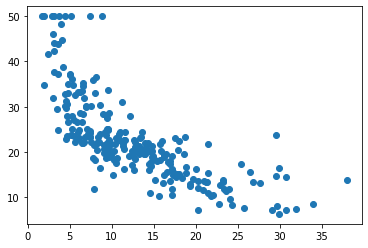

In [2]:
from matplotlib import pyplot as plt

plt.plot(X_train, y_train, 'o')

In [3]:
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import seaborn as sns

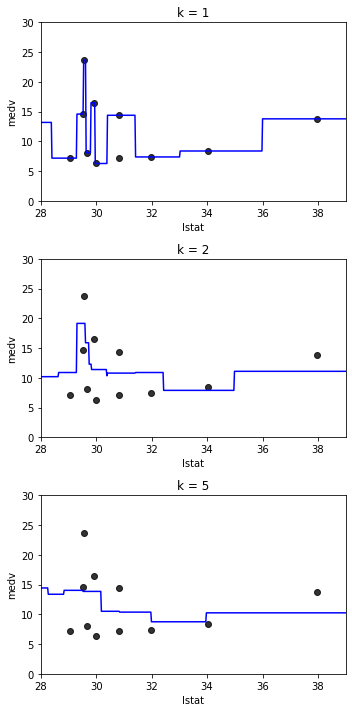

In [4]:
df_train = pd.DataFrame({'lstat': X_train.reshape(-1,), 'medv': y_train.reshape(-1,)})

fig, axes = plt.subplots(3, 1, figsize = (5,10))

n_neighbors = [1, 2, 5]

T = np.linspace(28, 39, 500)[:, np.newaxis] # For graphing

for i, n in enumerate(n_neighbors):
    knn = KNeighborsRegressor(n, weights = 'uniform')
    y_pred = knn.fit(X_train, y_train).predict(T)
    fit_df = pd.DataFrame({"T": T.reshape((-1,)), "y_pred": y_pred.reshape((-1,))})
    
    sns.lineplot(data = fit_df, x = 'T', y = 'y_pred', color = 'blue', ax = axes[i])
    sns.regplot(data = df_train, x = 'lstat', y = 'medv', ax = axes[i], fit_reg = False, scatter_kws={"color": "black"}).set(title = f'k = {n}')
    
    axes[i].set_xlim([28, 39])
    axes[i].set_ylim([0, 30])
    

fig.tight_layout()

KNN as classification problem

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
df = load_data("Boston") 

X_train, X_test, y_train, y_test = train_test_split(df[['lstat']], df[['medv']], train_size=250, random_state=42) # We are using blood pressure to predict total cholestrol

X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

y_train_cat = (y_train >= 14) * 2 + ((y_train < 14) * (y_train >= 10)) * 1
y_train_cat = y_train_cat.reshape((-1,))

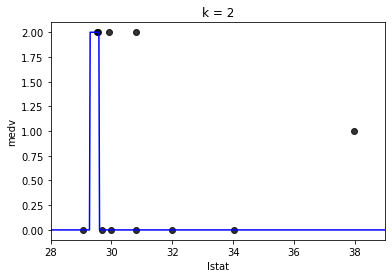

In [8]:
df_train = pd.DataFrame({'lstat': X_train.reshape(-1,), 'medv': y_train_cat.reshape(-1,)})

T = np.linspace(28, 39, 500)[:, np.newaxis] # For graphing

n = 2
knn = KNeighborsClassifier(n, weights = 'uniform')
y_pred = knn.fit(X_train, y_train_cat).predict(T)
fit_df = pd.DataFrame({'T': T.reshape((-1,)), 'y_pred': y_pred.reshape((-1,))})

sns.lineplot(data = fit_df, x = 'T', y = 'y_pred', color = 'blue')
sns.regplot(data = df_train, x = 'lstat', y = 'medv', fit_reg = False, scatter_kws={"color": "black"}).set(title = f'k = {n}')
    
plt.xlim([28, 39])
plt.show()

Now let's generate some simulated data so observe the bias-variance tradeoff of KNN regression

In [13]:
import random

def fsq(x):
    return pow(x, 2)

def get_sim_data(seed, f, sample_size = 100, sd = 0.01):
    random.seed(seed)
    x = np.random.rand(1,sample_size)
    y = np.random.normal(loc = f(x), scale = sd, size = (1, sample_size))  # `loc` is the mean of the distribution and `scale` is the standard deviation
    df = pd.DataFrame(np.concatenate((x,y)).transpose(), columns = ['X', 'Y'])
    return df

In [14]:
x_fixed = np.array(0.9).reshape(-1,1) # a fixed point that we want to make prediction at

predictions = pd.DataFrame(columns = ['k = 1', 'k = 5', 'k = 10', 'k = 100'], index = range(0,250))

for i in range(0,250):
    sim_data = get_sim_data(seed = random.randint(1000, 10000), f = fsq, sample_size = 100, sd = 0.3)
    X_train = np.array(sim_data['X']).reshape(-1, 1)
    y_train = np.array(sim_data['Y']).reshape(-1, 1)
  
    knn1 = KNeighborsRegressor(1, weights = 'uniform')
    knn5 = KNeighborsRegressor(5, weights = 'uniform')
    knn10 = KNeighborsRegressor(10, weights = 'uniform')
    knn100 = KNeighborsRegressor(100, weights = 'uniform')

    predictions.loc[i, 'k = 1'] = knn1.fit(X_train, y_train).predict(x_fixed).item()
    predictions.loc[i, 'k = 5'] = knn5.fit(X_train, y_train).predict(x_fixed).item()
    predictions.loc[i, 'k = 10'] = knn10.fit(X_train, y_train).predict(x_fixed).item()
    predictions.loc[i, 'k = 100'] = knn100.fit(X_train, y_train).predict(x_fixed).item()

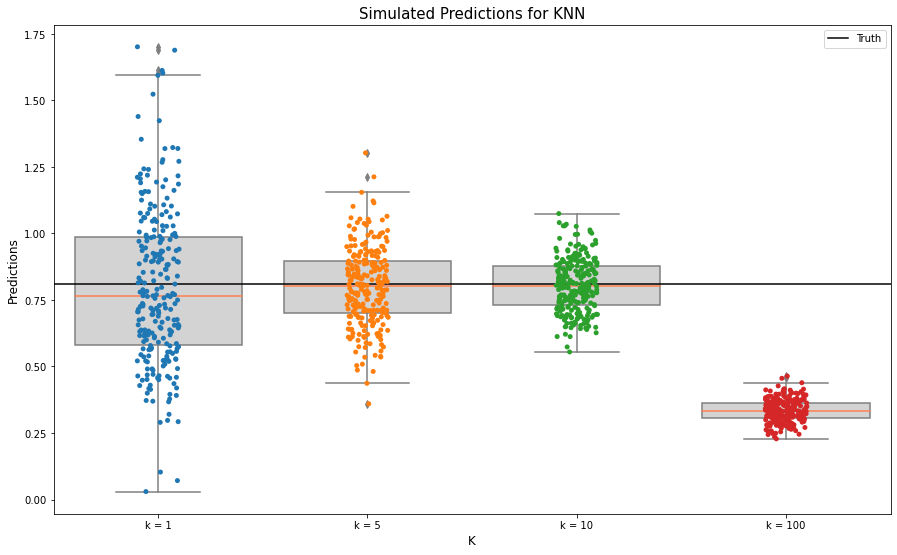

In [15]:
predictions['id'] = np.arange(0,250)

predictions_long = pd.melt(predictions, id_vars = 'id', value_vars = ['k = 1', 'k = 5', 'k = 10', 'k = 100'])

fig, ax = plt.subplots(figsize=(15, 9))

sns.stripplot(data = predictions_long, x = 'variable', y = 'value', ax = ax)
sns.boxplot(data = predictions_long, x = 'variable', y = 'value', ax = ax, color = 'lightgrey', medianprops={"color": "coral"})
plt.axhline(y = 0.81, color = 'k', linestyle = '-', label = 'Truth')
plt.xlabel('K', fontsize = 12)
plt.ylabel('Predictions', fontsize = 12)
plt.title('Simulated Predictions for KNN', fontsize = 15)
plt.legend()

